In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import PolynomialFeatures

from itertools import combinations
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(r"C:\Users\PRADYUM\Desktop\Intern_tasks\Task 5\KAG_conversion_data.csv")

In [3]:
df.describe()

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1.143000e+03,1143.000000,1143.000000,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,9.872611e+05,1067.382327,133783.989501,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,1.939928e+05,121.629393,20500.308622,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,7.087460e+05,916.000000,103916.000000,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,7.776325e+05,936.000000,115716.000000,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,1.121185e+06,1178.000000,144549.000000,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,1.121804e+06,1178.000000,144657.500000,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,1.314415e+06,1178.000000,179982.000000,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [4]:
df.shape

(1143, 11)

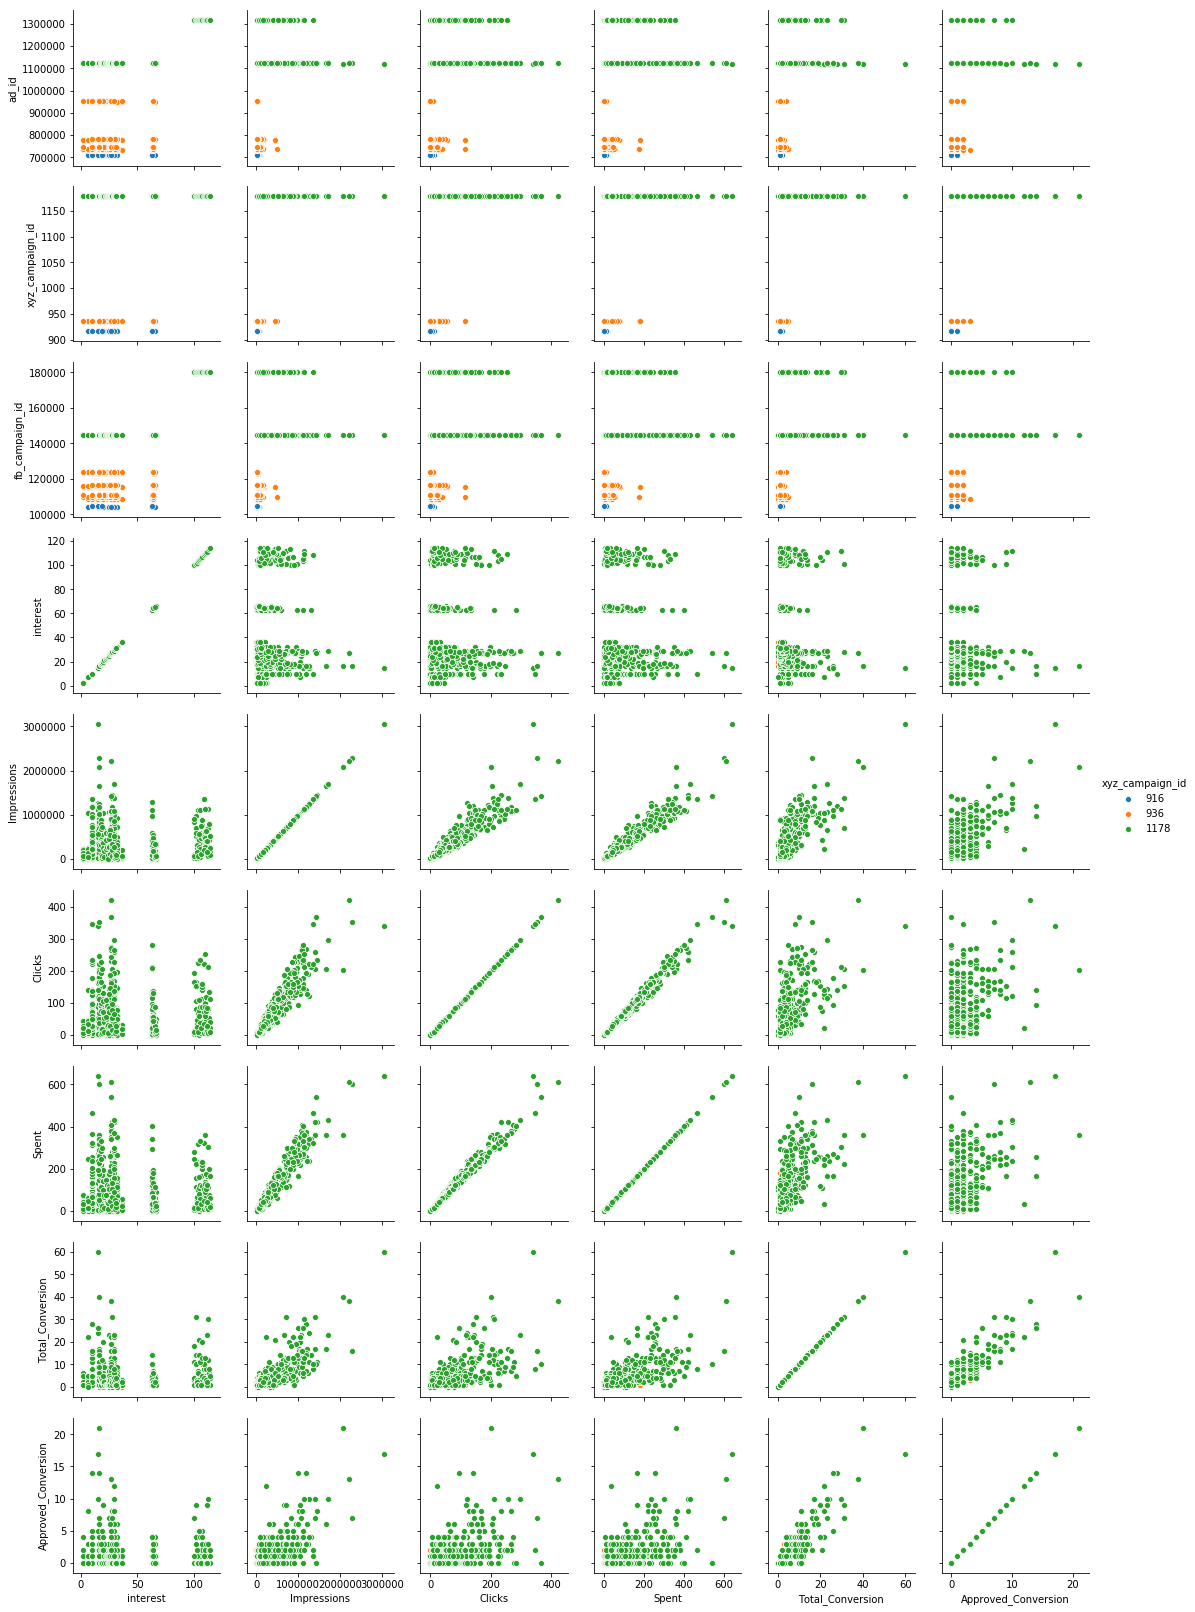

In [5]:
sns.pairplot(data=df,
    y_vars=['ad_id','xyz_campaign_id','fb_campaign_id','interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'],
    x_vars=['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'] , hue='xyz_campaign_id')

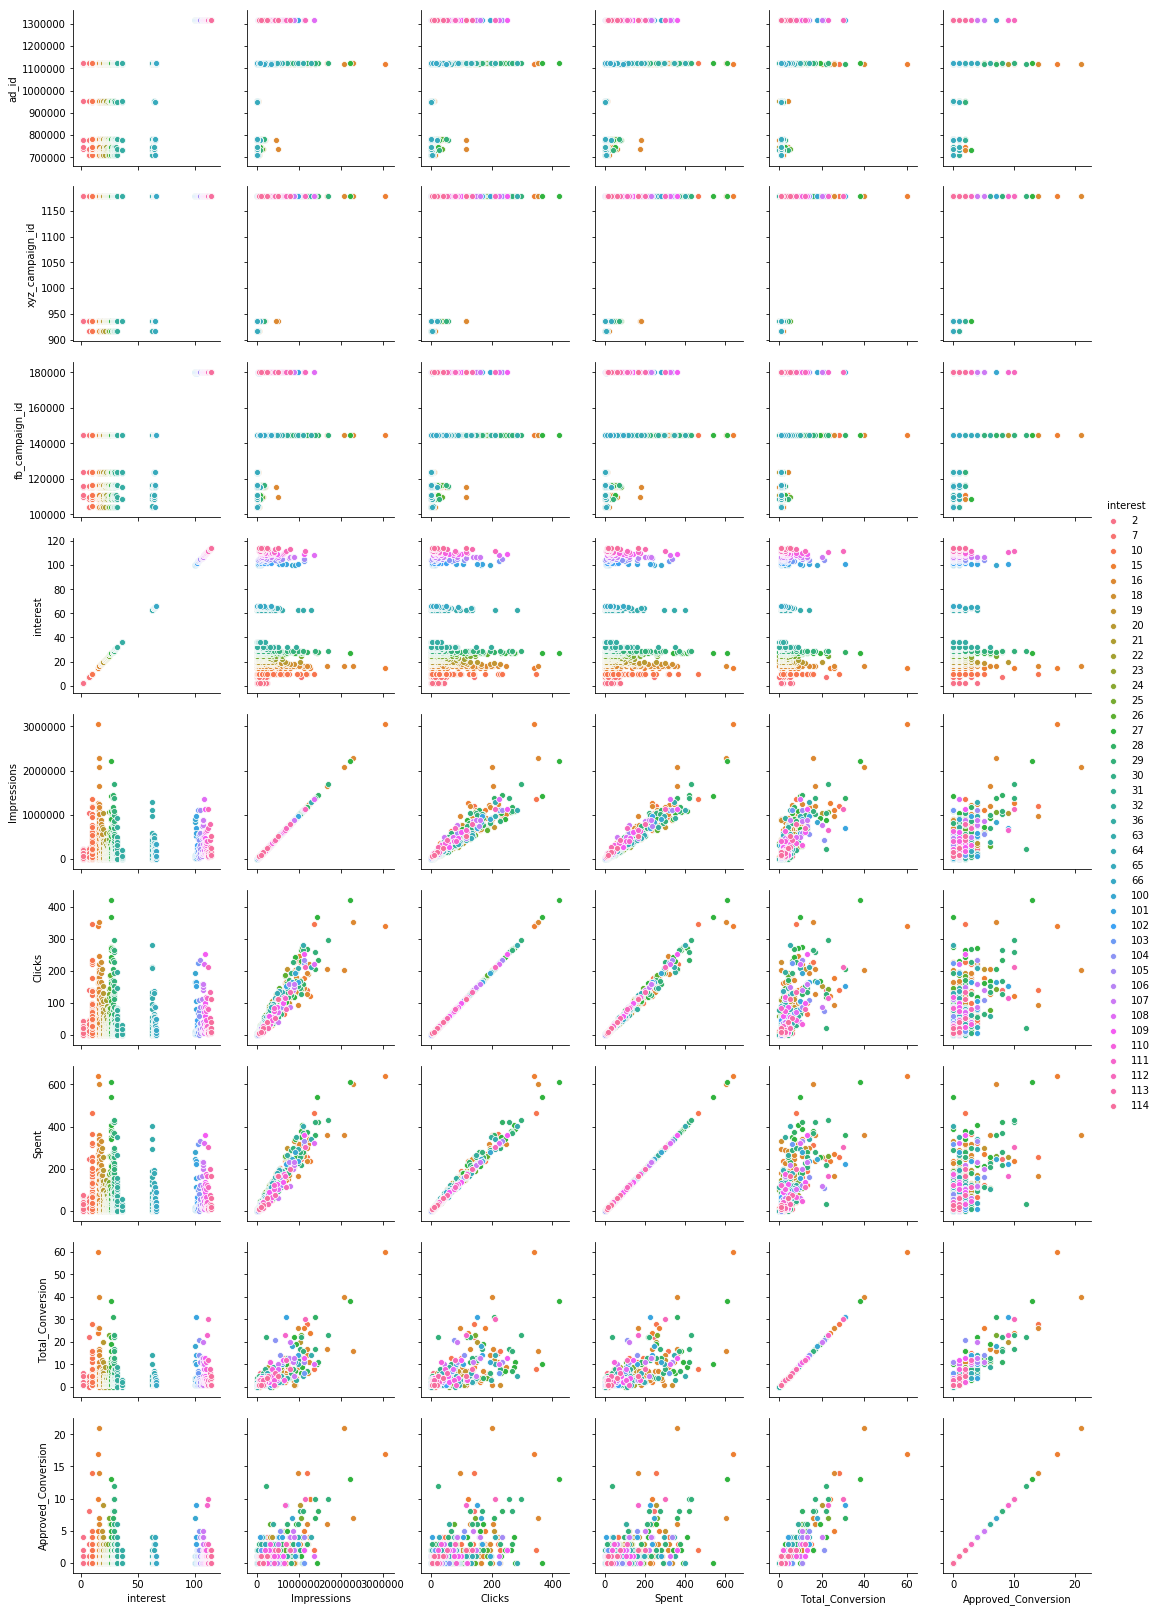

In [6]:
sns.pairplot(data=df,
    y_vars=['ad_id','xyz_campaign_id','fb_campaign_id','interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'],
    x_vars=['interest', 'Impressions', 'Clicks', 'Spent', 'Total_Conversion', 'Approved_Conversion'] , hue='interest')

Create a new variable to determine if conversion was successful or not.

In [7]:
df['success'] = [1 if x >= 1 else 0 for x in df['Approved_Conversion']]
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,success
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1


## DATA CLEANING AND FEATURE ENGINEERING

Dropped outliers for variables Impressions and Spent. The cut off was at >2,000,000 for Impressions and >500 for Spent (5 rows were dropped as result)

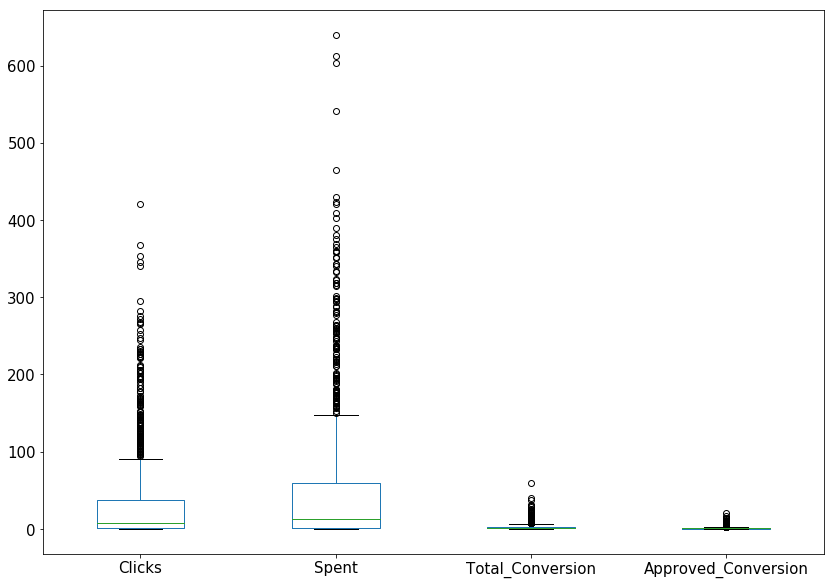

In [8]:
df.iloc[:,7:-1].boxplot(grid=False, fontsize=15, figsize=(14,10))

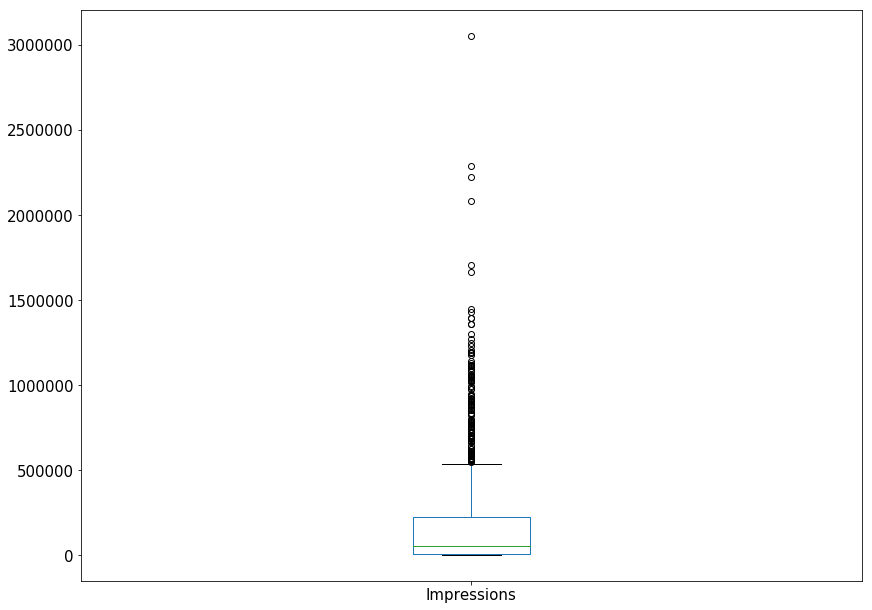

In [9]:
df.iloc[:,6:7].boxplot(grid=False, fontsize=15, figsize=(14,10.5))

In [10]:
# getting rid of the outliers for impressions and spent
# cut off at >2,000,000 impressions and >500 spent

df.drop(df.loc[df['Impressions']>2000000].index, inplace=True)
df.drop(df.loc[df['Spent']>500].index, inplace=True)
df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,success
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1,1


Appears we dropped 5 rows

### EDA

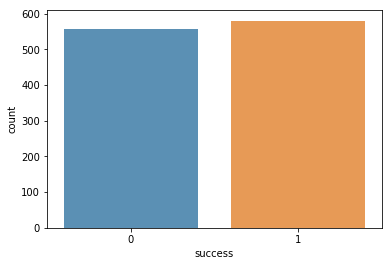

In [11]:
# does not present class imbalance here

sns.countplot(df['success'], alpha =.80)

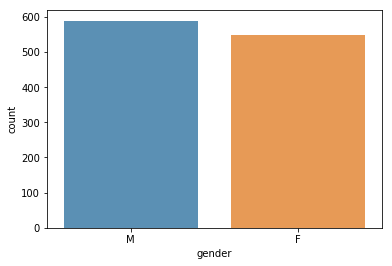

In [12]:
# nor here, similar counts of Males and Females

sns.countplot(df['gender'], alpha =.80)

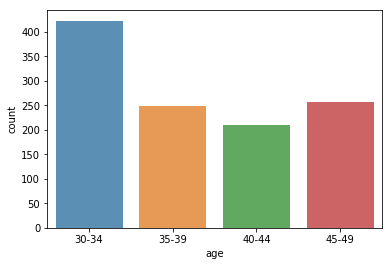

In [13]:
sns.countplot(df['age'], alpha =.80)

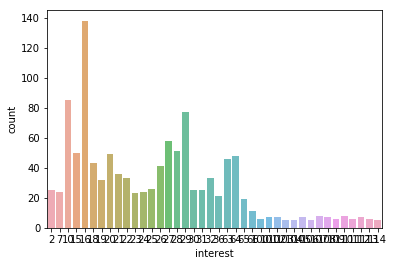

In [14]:
sns.countplot(df['interest'], alpha =.80)

In [15]:
# Which gender had more success in conversion?
df_gender = df.set_index(['gender', 'success'])
df_gender

ad_id  xyz_campaign_id  fb_campaign_id    age  interest  \
gender success                                                              
M      1         708746              916          103916  30-34        15   
       0         708749              916          103917  30-34        16   
       0         708771              916          103920  30-34        20   
       0         708815              916          103928  30-34        28   
       1         708818              916          103928  30-34        28   
       1         708820              916          103929  30-34        29   
       0         708889              916          103940  30-34        15   
       1         708895              916          103941  30-34        16   
       0         708953              916          103951  30-34        27   
       0         708958              916          103952  30-34        28   
       0         708979              916          103955  30-34        31   
       0         709023              916          103962  30-34         7   
       0         709038              916          103965  30-34        16   
       0         709040              916          103965  30-34        16   
       1         709059              916          103968  30-34        20   
       1         709105              916          103976  30-34        28   
       0         709115              916          103978  30-34        30   
       1         709124              916          103979  30-34        31   
       0         709179              916          103988  35-39        15   
       1         709183              916          103989  35-39        16   
       1         709320              916          104012  35-39        15   
       0         709323              916          104012  35-39        15   
       0         709326              916          104013  35-39        16   
       1         709327              916          104013  35-39        16   
       1         709328              916          104013  35-39        16   
       0         709455              916          104034  35-39         7   
       1         709544              916          104049  35-39        29   
       0         709614              916          104061  40-44        16   
       1         709756              916          104085  40-44        16   
       0         709761              916          104085  40-44        16   
...                 ...              ...             ...    ...       ...   
F      1        1314384             1178          179951  35-39       113   
       1        1314385             1178          179952  35-39       114   
       1        1314386             1178          179953  40-44       100   
       1        1314387             1178          179954  40-44       101   
       0        1314388             1178          179955  40-44       102   
       0        1314389             1178          179956  40-44       103   
       0        1314390             1178          179957  40-44       104   
       0        1314391             1178          179958  40-44       105   
       1        1314392             1178          179959  40-44       106   
       1        1314393             1178          179960  40-44       107   
       1        1314394             1178          179961  40-44       108   
       1        1314395             1178          179962  40-44       109   
       1        1314396             1178          179963  40-44       110   
       0        1314397             1178          179964  40-44       111   
       1        1314398             1178          179965  40-44       112   
       1        1314400             1178          179967  40-44       114   
       1        1314401             1178          179968  45-49       100   
       1        1314402             1178          179969  45-49       101   
       1        1314403             1178          179970  45-49       102   
       0      

In [16]:
# Which age group had more success in conversion?

df_age = df.set_index(['age', 'success'])
df_age

ad_id  xyz_campaign_id  fb_campaign_id gender  interest  \
age   success                                                              
30-34 1         708746              916          103916      M        15   
      0         708749              916          103917      M        16   
      0         708771              916          103920      M        20   
      0         708815              916          103928      M        28   
      1         708818              916          103928      M        28   
      1         708820              916          103929      M        29   
      0         708889              916          103940      M        15   
      1         708895              916          103941      M        16   
      0         708953              916          103951      M        27   
      0         708958              916          103952      M        28   
      0         708979              916          103955      M        31   
      0         709023              916          103962      M         7   
      0         709038              916          103965      M        16   
      0         709040              916          103965      M        16   
      1         709059              916          103968      M        20   
      1         709105              916          103976      M        28   
      0         709115              916          103978      M        30   
      1         709124              916          103979      M        31   
35-39 0         709179              916          103988      M        15   
      1         709183              916          103989      M        16   
      1         709320              916          104012      M        15   
      0         709323              916          104012      M        15   
      0         709326              916          104013      M        16   
      1         709327              916          104013      M        16   
      1         709328              916          104013      M        16   
      0         709455              916          104034      M         7   
      1         709544              916          104049      M        29   
40-44 0         709614              916          104061      M        16   
      1         709756              916          104085      M        16   
      0         709761              916          104085      M        16   
...                ...              ...             ...    ...       ...   
35-39 1        1314384             1178          179951      F       113   
      1        1314385             1178          179952      F       114   
40-44 1        1314386             1178          179953      F       100   
      1        1314387             1178          179954      F       101   
      0        1314388             1178          179955      F       102   
      0        1314389             1178          179956      F       103   
      0        1314390             1178          179957      F       104   
      0        1314391             1178          179958      F       105   
      1        1314392             1178          179959      F       106   
      1        1314393             1178          179960      F       107   
      1        1314394             1178          179961      F       108   
      1        1314395             1178          179962      F       109   
      1        1314396             1178          179963      F       110   
      0        1314397             1178          179964      F       111   
      1        1314398             1178          179965      F       112   
      1        1314400             1178          179967      F       114   
45-49 1        1314401             1178          179968      F       100   
      1        1314402             1178          179969      F       101   
      1        1314403             1178          179970      F       102   
      0        1314404             1178          179971      F   

In [17]:
# how many of each gender
df.groupby(['gender']).count()

,ad_id,xyz_campaign_id,fb_campaign_id,age,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,success
gender,,,,,,,,,,,
F,549,549,549,549,549,549,549,549,549,549,549
M,589,589,589,589,589,589,589,589,589,589,589


In [18]:
# how many of each age group
df.groupby(['age']).count()

,ad_id,xyz_campaign_id,fb_campaign_id,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,success
age,,,,,,,,,,,
30-34,423,423,423,423,423,423,423,423,423,423,423
35-39,248,248,248,248,248,248,248,248,248,248,248
40-44,210,210,210,210,210,210,210,210,210,210,210
45-49,257,257,257,257,257,257,257,257,257,257,257


In [19]:
# how many of each gender actually bought
bought_gender = df.groupby(['gender']).sum()['success']
bought_gender

gender
F    269
M    311
Name: success, dtype: int64

In [20]:
# how many of each age group actually bought
bought_age = df.groupby(['age']).sum()['success']
bought_age

age
30-34    223
35-39    129
40-44    107
45-49    121
Name: success, dtype: int64

In [21]:
# how many of each gender didnt buy
not_gender = df.groupby(['gender']).count()['success']-df.groupby(['gender']).sum()['success']

In [22]:
# how many of each age group didnt buy
not_age = df.groupby(['age']).count()['success']-df.groupby(['age']).sum()['success']

In [23]:
print(bought_gender)
print(not_gender)
print(bought_age)
print(not_age)

gender
F    269
M    311
Name: success, dtype: int64
gender
F    280
M    278
Name: success, dtype: int64
age
30-34    223
35-39    129
40-44    107
45-49    121
Name: success, dtype: int64
age
30-34    200
35-39    119
40-44    103
45-49    136
Name: success, dtype: int64


In [24]:
success_gender = pd.concat([bought_gender, not_gender], axis=1, sort=False)
success_gender.columns = ['Bought', "Didn't Buy"]
success_gender

,Bought,Didn't Buy
gender,,
F,269,280
M,311,278


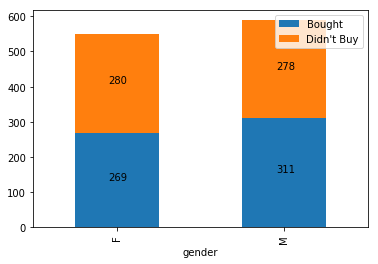

In [25]:
ax = success_gender.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:0.0f}'.format(height), (p.get_x()+0.4*width, p.get_y()+0.5*height))

In [26]:
success_age = pd.concat([bought_age, not_age], axis=1, sort=False)
success_age.columns = ['Bought', "Didn't Buy"]
success_age

,Bought,Didn't Buy
age,,
30-34,223,200
35-39,129,119
40-44,107,103
45-49,121,136


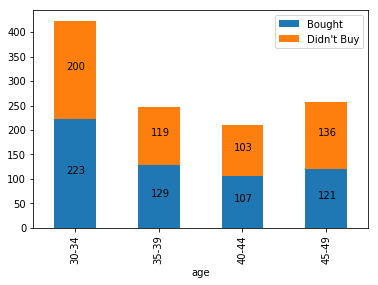

In [27]:
ax = success_age.plot(kind='bar', stacked=True)
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate('{:0.0f}'.format(height), (p.get_x()+0.3*width, p.get_y()+0.5*height))

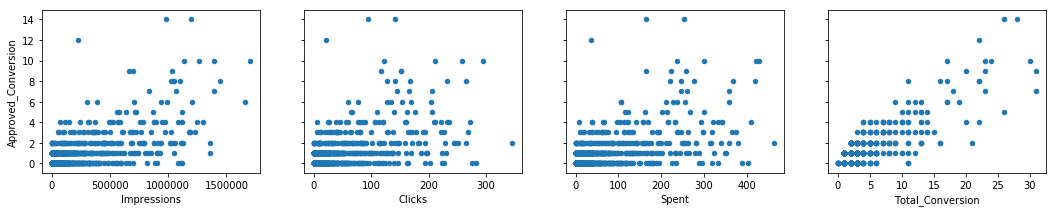

In [28]:
# visualize the relationship with Approved_Conversion using scatterplots
fig, axs = plt.subplots(1, 4, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Impressions', 'Clicks', 'Spent', 'Total_Conversion']):
    df.plot(kind='scatter', x=j, y='Approved_Conversion', ax=axs[i])

plt.show()

In [29]:
# checking for correlation >0.75
correlation = abs(df.corr()) > 0.75
correlation

,ad_id,xyz_campaign_id,fb_campaign_id,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion,success
ad_id,True,True,True,False,False,False,False,False,False,False
xyz_campaign_id,True,True,True,False,False,False,False,False,False,False
fb_campaign_id,True,True,True,False,False,False,False,False,False,False
interest,False,False,False,True,False,False,False,False,False,False
Impressions,False,False,False,False,True,True,True,True,False,False
Clicks,False,False,False,False,True,True,True,False,False,False
Spent,False,False,False,False,True,True,True,False,False,False
Total_Conversion,False,False,False,False,True,False,False,True,True,False
Approved_Conversion,False,False,False,False,False,False,False,True,True,False
success,False,False,False,False,False,False,False,False,False,True


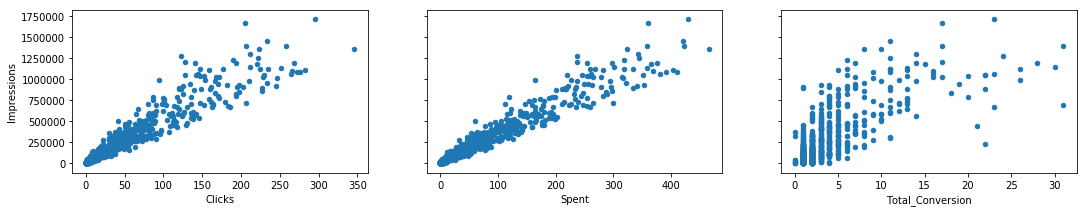

In [30]:
# visualize the relationship with of variables with high correlations
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(18, 3))

for i, j in enumerate(['Clicks', 'Spent', 'Total_Conversion']):
    df.plot(kind='scatter', x=j, y='Impressions', ax=axs[i])

plt.show()

## Dummy variables

In [31]:
df.loc[df['xyz_campaign_id'] == 916, 'xyz_campaign_id'] = 'x'
df.loc[df['xyz_campaign_id'] == 936, 'xyz_campaign_id'] = 'y'
df.loc[df['xyz_campaign_id'] == 1178, 'xyz_campaign_id'] = 'z'
df.drop(columns=['ad_id', 'fb_campaign_id'], axis=1, inplace=True)

In [32]:
bins= [0,1,5,10,20,50,100]
labels = ['Amount_Purchased_0','Amount_Purchased_1-5','Amount_Purchased_5-10', 'Amount_Purchased_10-20', 'Amount_Purchased_20-50', 'Amount_Purchased_50-100']
df['Amount_Purchased'] = pd.cut(df['Approved_Conversion'], bins=bins, labels=labels, right=False)
df = df.drop(columns=['Approved_Conversion'])
df.head()

,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,success,Amount_Purchased
0,x,30-34,M,15,7350,1,1.43,2,1,Amount_Purchased_1-5
1,x,30-34,M,16,17861,2,1.82,2,0,Amount_Purchased_0
2,x,30-34,M,20,693,0,0.00,1,0,Amount_Purchased_0
3,x,30-34,M,28,4259,1,1.25,1,0,Amount_Purchased_0
4,x,30-34,M,28,4133,1,1.29,1,1,Amount_Purchased_1-5


In [33]:
bins= [0,1,5,10,20,50,100]
labels = ['Amount_Clicked_0','Amount_Clicked_1-5', 'Amount_Clicked_5-10', 'Amount_Clicked_10-20', 'Amount_Clicked_20-50', 'Amount_Clicked_50-100']
df['Amount_Clicked'] = pd.cut(df['Total_Conversion'], bins=bins, labels=labels, right=False)
df = df.drop(columns=['Total_Conversion'])
df.head()

,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,success,Amount_Purchased,Amount_Clicked
0,x,30-34,M,15,7350,1,1.43,1,Amount_Purchased_1-5,Amount_Clicked_1-5
1,x,30-34,M,16,17861,2,1.82,0,Amount_Purchased_0,Amount_Clicked_1-5
2,x,30-34,M,20,693,0,0.00,0,Amount_Purchased_0,Amount_Clicked_1-5
3,x,30-34,M,28,4259,1,1.25,0,Amount_Purchased_0,Amount_Clicked_1-5
4,x,30-34,M,28,4133,1,1.29,1,Amount_Purchased_1-5,Amount_Clicked_1-5


In [34]:
df[['interest']].apply(lambda x: x.astype('category')).dtypes

interest    category
dtype: object

In [35]:
xyz_campaign_id = pd.get_dummies(df['xyz_campaign_id'], drop_first = True)
gender = pd.get_dummies(df['gender'], drop_first = True) 
interest = pd.get_dummies(df['interest'], drop_first = True)
age = pd.get_dummies(df['age'], drop_first = True)
Amount_Purchased = pd.get_dummies(df['Amount_Purchased'], drop_first = True)
Amount_Clicked = pd.get_dummies(df['Amount_Clicked'], drop_first = True)

df.drop(['Amount_Purchased','Amount_Clicked', 'xyz_campaign_id','gender', 'interest', 'age'], axis = 1, inplace = True)

df1 = pd.concat([df, xyz_campaign_id, gender, interest, age, Amount_Purchased, Amount_Clicked], axis = 1)
df1.columns

Index([            'Impressions',                  'Clicks',
                         'Spent',                 'success',
                             'y',                       'z',
                             'M',                         7,
                              10,                        15,
                              16,                        18,
                              19,                        20,
                              21,                        22,
                              23,                        24,
                              25,                        26,
                              27,                        28,
                              29,                        30,
                              31,                        32,
                              36,                        63,
                              64,                        65,
                              66,                       100,
                        

## CLEAN_DATA

In [36]:
df1.to_csv("Clean_Data.csv")
df1

,Impressions,Clicks,Spent,success,y,z,M,7,10,15,...,Amount_Purchased_1-5,Amount_Purchased_5-10,Amount_Purchased_10-20,Amount_Purchased_20-50,Amount_Purchased_50-100,Amount_Clicked_1-5,Amount_Clicked_5-10,Amount_Clicked_10-20,Amount_Clicked_20-50,Amount_Clicked_50-100
0,7350,1,1.430000,1,0,0,1,0,0,1,...,1,0,0,0,0,1,0,0,0,0
1,17861,2,1.820000,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,693,0,0.000000,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,4259,1,1.250000,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4133,1,1.290000,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
5,1915,0,0.000000,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
6,15615,3,4.770000,0,0,0,1,0,0,1,...,0,0,0,0,0,1,0,0,0,0
7,10951,1,1.270000,1,0,0,1,0,0,0,...,1,0,0,0,0,1,0,0,0,0
8,2355,1,1.500000,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,9502,3,3.160000,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


## DEFINING BASELINE MODEL

In [37]:
# Create matrix of features
X = df1.drop('success', axis = 1) 

# Create target variable
y = df1['success'] 

X.columns = X.columns.map(str)

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=35)

In [39]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression(fit_intercept = False, C = 1e12)
logreg.fit(X_train, y_train)
dictionary = dict(zip(list(X_train.columns), list(logreg.coef_[0])))
dictionary

{'Impressions': 2.1383876793770296e-06,
 'Clicks': -1.1520451936737072e-06,
 'Spent': -1.35281762967121e-06,
 'y': -7.846209074527078e-08,
 'z': -2.7972810238423113e-08,
 'M': -3.946088091998078e-08,
 '7': -7.494592744456163e-09,
 '10': 3.4954497909064142e-09,
 '15': -3.5680953880988396e-09,
 '16': -1.6005731131866842e-08,
 '18': -1.1240588126437085e-09,
 '19': -5.7798801759641276e-09,
 '20': -4.373079055048907e-09,
 '21': 5.466056329131276e-10,
 '22': -1.2454572356791742e-08,
 '23': -1.1674295375616078e-08,
 '24': -2.3895038115248627e-09,
 '25': -5.178591570639758e-09,
 '26': -9.205006961722627e-09,
 '27': -1.887380684267949e-08,
 '28': -1.3517913384836179e-08,
 '29': 6.310193035188709e-09,
 '30': -3.152991090959867e-09,
 '31': -3.254707058059959e-09,
 '32': 1.2917851212076908e-09,
 '36': -6.332368616005307e-09,
 '63': -1.5933237696777626e-09,
 '64': -5.855696249514975e-09,
 '65': 4.86677802213415e-09,
 '66': -3.2178801334426864e-09,
 '100': -1.4767423296320906e-09,
 '101': 2.13596973

In [40]:
y_pred_class = logreg.predict(X_test)

In [41]:
from sklearn import metrics
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_class))

Test Accuracy score:  0.5131578947368421
Test F1 score:  0.6782608695652175


In [42]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred_class)
classes = ['Bought', "Didn't Buy"]

Confusion Matrix, without normalization
[[  0 111]
 [  0 117]]


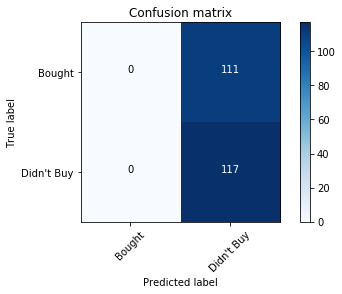

In [43]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
import itertools
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## FEATURE SELECTION

In [44]:
# create polynomial and interaction terms

poly = PolynomialFeatures(degree=3, include_bias=False)
poly.fit(X)
column_names = poly.get_feature_names(X.columns)
df_poly= pd.DataFrame(poly.transform(X), columns=column_names)

X_train_base, X_test_base, y_train_base, y_test = train_test_split(df_poly, y, random_state=35,test_size=0.2)

In [45]:
print(X_train_base.shape, y_train_base.shape)
print(X_test_base.shape, y_test.shape)

(910, 35989) (910,)
(228, 35989) (228,)


In [46]:
# scaling the data

scaler = StandardScaler()
scaler.fit(X_train_base)
X_train_base =pd.DataFrame(data=scaler.transform(X_train_base), columns=column_names)
X_test_base =pd.DataFrame(data=scaler.transform(X_test_base), columns=column_names)

In [47]:
# running log model with all ~36k features

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train_base, y_train_base)
y_pred_base_class = logreg.predict(X_test_base)

In [48]:
print('Test Accuracy score: ', metrics.accuracy_score(y_test, y_pred_base_class))
print('Test F1 score: ', metrics.f1_score(y_test, y_pred_base_class))

Test Accuracy score:  0.9780701754385965
Test F1 score:  0.9785407725321887


Confusion Matrix, without normalization
[[109   2]
 [  3 114]]


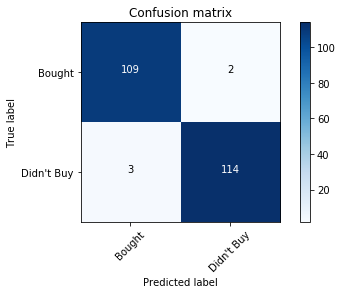

In [49]:
cm = confusion_matrix(y_test, y_pred_base_class)
classes = ['Bought', "Didn't Buy"]
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [50]:
dictionary = dict(zip(list(X_train_base.columns), list(logreg.coef_[0])))

In [51]:
35989 - sum(value == 0 for value in dictionary.values())

# most coefficients went to 0 except for 4,385 features

4385

In [52]:
log_coef01 = pd.DataFrame(data=logreg.coef_)
log_coef01.columns = X_train_base.columns
log_coef01

,Impressions,Clicks,Spent,y,z,M,7,10,15,16,...,Amount_Clicked_10-20^3,Amount_Clicked_10-20^2 Amount_Clicked_20-50,Amount_Clicked_10-20^2 Amount_Clicked_50-100,Amount_Clicked_10-20 Amount_Clicked_20-50^2,Amount_Clicked_10-20 Amount_Clicked_20-50 Amount_Clicked_50-100,Amount_Clicked_10-20 Amount_Clicked_50-100^2,Amount_Clicked_20-50^3,Amount_Clicked_20-50^2 Amount_Clicked_50-100,Amount_Clicked_20-50 Amount_Clicked_50-100^2,Amount_Clicked_50-100^3
0,0.014994,0.00999,0.009794,-0.063462,0.017956,-0.021467,-0.023625,0.013842,-0.014813,0.006481,...,0.023075,0.0,0.0,0.0,0.0,0.0,0.021648,0.0,0.0,0.0


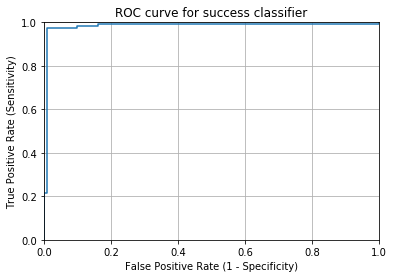

In [53]:
y_pred_base_prob = logreg.predict_proba(X_test_base)[:, 1]

# what does the ROC curve look like?
# first argument is true values, second argument is predicted probabilities
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_pred_base_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for success classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)
plt.show()

##  log regression with polynomial and interactions gives accuracy and F1 of 0.98 and 0.98

## KNN

In [54]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=35)

# scale the data
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()  
scaler.fit(X_train)

X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)  

# baseline KNN model
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
from sklearn import metrics
print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.8491228070175438
F1: 0.8501742160278745


Confusion Matrix, without normalization
[[120  20]
 [ 23 122]]


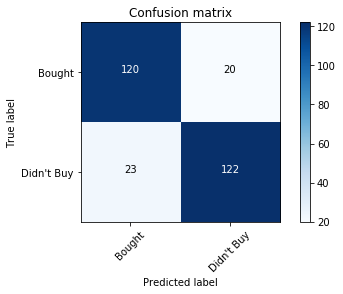

In [55]:
cm = confusion_matrix(y_test, y_pred_class)
classes = ['Bought', "Didn't Buy"]
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

In [56]:
# search for optimal value of k

k_range = list(range(1, 150))
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_predict = knn.predict(X_test)
    score = metrics.f1_score(y_test, y_predict, average='weighted')
    k_scores.append( score)
print(k_scores)

[0.8491339526960985, 0.7925309416599, 0.8421052631578947, 0.800776735020048, 0.8524790837841625, 0.8016803796090723, 0.8315665061402645, 0.8271903476568828, 0.8069842796252029, 0.7752865784839523, 0.7709833934711423, 0.7710686252798897, 0.7773211157965136, 0.7748653245544893, 0.7733490052675112, 0.7643684210526317, 0.7554721513090104, 0.7467515408311208, 0.7419752611610396, 0.7429473684210527, 0.7532509984063649, 0.7409174469596, 0.7747903117446201, 0.7594993729987704, 0.7960496031952043, 0.795550827250988, 0.7718905122843305, 0.7634579799328199, 0.778849375652556, 0.7885008557768842, 0.7999113398761221, 0.7991700527362324, 0.8210658508721169, 0.8209071620410076, 0.8245614035087719, 0.8243798616478123, 0.835095842155599, 0.8419769076832421, 0.8666436713642783, 0.8630972325468204, 0.8631343073705984, 0.8666272655634358, 0.8736842105263158, 0.873690431140394, 0.8736281698033905, 0.8701850290640848, 0.887699933780445, 0.887719298245614, 0.887699933780445, 0.8912200317517734, 0.88769993378

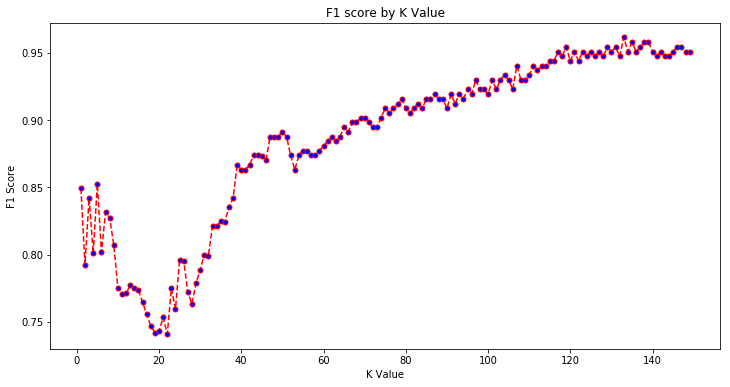

In [57]:
import matplotlib.pyplot as plt  

plt.figure(figsize=(12, 6))  
plt.plot(k_range, k_scores, color='red', linestyle='dashed', marker='o',  
         markerfacecolor='blue', markersize=5)
plt.title('F1 score by K Value')  
plt.xlabel('K Value')  
plt.ylabel('F1 Score') 
plt.show()

# optimal k appears at 131

In [58]:
# try different value for k
knn = KNeighborsClassifier(n_neighbors = 131)

# fit the model with data
knn.fit(X_train, y_train)

# make class predictions for the testing set
y_pred_class = knn.predict(X_test)

print('Accuracy:' + str(metrics.accuracy_score(y_test, y_pred_class)))
print('F1: ' + str(metrics.f1_score(y_test, y_pred_class)))

Accuracy:0.9543859649122807
F1: 0.9550173010380624


Confusion Matrix, without normalization
[[134   6]
 [  7 138]]


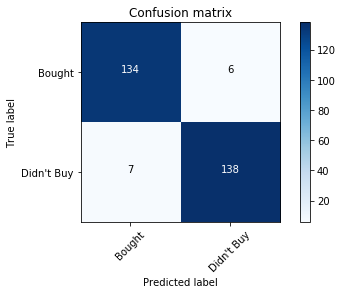

In [59]:
cm = confusion_matrix(y_test, y_pred_class)
classes = ['Bought', "Didn't Buy"]
plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues)

## optimal accuracy at k=131, but still not as good as log

## FEATURE IMPORTANCE

In [70]:
from sklearn.preprocessing import StandardScaler

X = df1.drop('success', axis = 1) 

y = df1['success'] 

X.columns = X.columns.map(str)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

sc=StandardScaler()
X_train_scaled= sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)
X.columns

Index(['Impressions', 'Clicks', 'Spent', 'y', 'z', 'M', '7', '10', '15', '16',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '36', '63', '64', '65', '66', '100', '101', '102',
       '103', '104', '105', '106', '107', '108', '109', '110', '111', '112',
       '113', '114', '35-39', '40-44', '45-49', 'Amount_Purchased_1-5',
       'Amount_Purchased_5-10', 'Amount_Purchased_10-20',
       'Amount_Purchased_20-50', 'Amount_Purchased_50-100',
       'Amount_Clicked_1-5', 'Amount_Clicked_5-10', 'Amount_Clicked_10-20',
       'Amount_Clicked_20-50', 'Amount_Clicked_50-100'],
      dtype='object')

In [72]:
# Create logistic regression
logistic = LogisticRegression()

# Create regularization penalty space
penalty = ['l1', 'l2']

# Create regularization hyperparameter space, these are penalty sizes
C = C_param_range = [0.001,0.01,0.1, 0.5, 1, 2, 5, 10]

# Create hyperparameter options
hyperparameters = dict(C=C, penalty=penalty)

# Create grid search using 5-fold cross validation
clf_gs = GridSearchCV(logistic, hyperparameters, cv=5, scoring='f1') 

# Fit grid search
model = clf_gs.fit(X_train_scaled, y_train)

# View best hyperparameters
print('Best Penalty:', model.best_estimator_.get_params()['penalty'])
print('Best C:', model.best_estimator_.get_params()['C'])

Best Penalty: l1
Best C: 0.1


In [73]:
y_pred_train = model.best_estimator_.predict(X_train_scaled)

y_pred_test = model.best_estimator_.predict(X_test_scaled)

# Model Accuracy, how often is the classifier correct?
print("Training F1 Score:",metrics.f1_score(y_train, y_pred_train))
print("Testing F1 Score:",metrics.f1_score(y_test, y_pred_test))

Training F1 Score: 1.0
Testing F1 Score: 1.0


In [77]:
# Sort feature importances in descending order

feature_cols = X.columns
feature_cols

model_params = list(zip(feature_cols, model.best_estimator_.coef_[0]))

model_params.sort(key = lambda x: abs(x[1]), reverse=True)

model_params

[('Amount_Purchased_1-5', 4.191422986663328),
 ('Amount_Purchased_5-10', 1.018572546716963),
 ('Amount_Purchased_10-20', 0.5076621224925416),
 ('Impressions', 0.0),
 ('Clicks', 0.0),
 ('Spent', 0.0),
 ('y', 0.0),
 ('z', 0.0),
 ('M', 0.0),
 ('7', 0.0),
 ('10', 0.0),
 ('15', 0.0),
 ('16', 0.0),
 ('18', 0.0),
 ('19', 0.0),
 ('20', 0.0),
 ('21', 0.0),
 ('22', 0.0),
 ('23', 0.0),
 ('24', 0.0),
 ('25', 0.0),
 ('26', 0.0),
 ('27', 0.0),
 ('28', 0.0),
 ('29', 0.0),
 ('30', 0.0),
 ('31', 0.0),
 ('32', 0.0),
 ('36', 0.0),
 ('63', 0.0),
 ('64', 0.0),
 ('65', 0.0),
 ('66', 0.0),
 ('100', 0.0),
 ('101', 0.0),
 ('102', 0.0),
 ('103', 0.0),
 ('104', 0.0),
 ('105', 0.0),
 ('106', 0.0),
 ('107', 0.0),
 ('108', 0.0),
 ('109', 0.0),
 ('110', 0.0),
 ('111', 0.0),
 ('112', 0.0),
 ('113', 0.0),
 ('114', 0.0),
 ('35-39', 0.0),
 ('40-44', 0.0),
 ('45-49', 0.0),
 ('Amount_Purchased_20-50', 0.0),
 ('Amount_Purchased_50-100', 0.0),
 ('Amount_Clicked_1-5', 0.0),
 ('Amount_Clicked_5-10', 0.0),
 ('Amount_Clicked_10

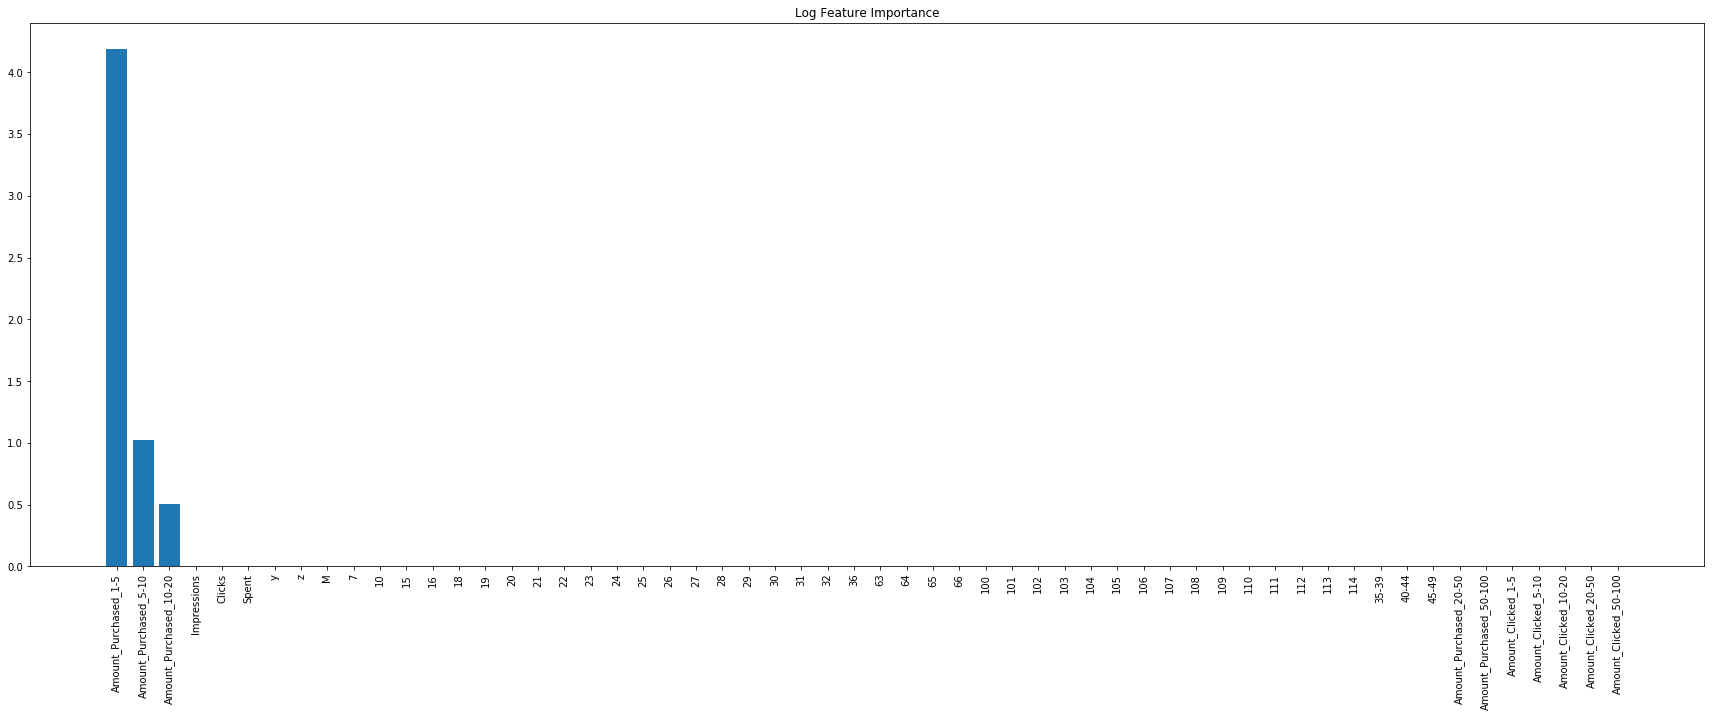

In [78]:
# Rearrange feature names so they match the sorted feature importances
model_features = [str(i[0]) for i in model_params]

feature_weights = [abs(i[1]) for i in model_params]

# Create plot
plt.figure(figsize=(30, 10))

# Create plot title
plt.title("Log Feature Importance")

# Add bars
plt.bar(model_features, feature_weights)

# Add feature names as x-axis labels
# plt.xticks(range(X.shape[1]), names, rotation=90)
plt.xticks(rotation=90)
# Show plot
plt.show()

## XGBOOST

In [79]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score, f1_score, roc_auc_score

In [94]:
df = pd.read_csv('Clean_Data.csv')

In [95]:
X = df.drop(['success'], axis = 1) 
df.head()

,Unnamed: 0,Impressions,Clicks,Spent,success,y,z,M,7,10,...,Amount_Purchased_1-5,Amount_Purchased_5-10,Amount_Purchased_10-20,Amount_Purchased_20-50,Amount_Purchased_50-100,Amount_Clicked_1-5,Amount_Clicked_5-10,Amount_Clicked_10-20,Amount_Clicked_20-50,Amount_Clicked_50-100
0,0,7350,1,1.43,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0
1,1,17861,2,1.82,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
2,2,693,0,0.00,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,3,4259,1,1.25,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,4,4133,1,1.29,1,0,0,1,0,0,...,1,0,0,0,0,1,0,0,0,0


In [96]:
X = df.drop(['success','Unnamed: 0'], axis = 1) 

# Create target variable
y = df['success'] 

# Create a list of the features being used 
feature_cols = X.columns
feature_cols

Index(['Impressions', 'Clicks', 'Spent', 'y', 'z', 'M', '7', '10', '15', '16',
       '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29',
       '30', '31', '32', '36', '63', '64', '65', '66', '100', '101', '102',
       '103', '104', '105', '106', '107', '108', '109', '110', '111', '112',
       '113', '114', '35-39', '40-44', '45-49', 'Amount_Purchased_1-5',
       'Amount_Purchased_5-10', 'Amount_Purchased_10-20',
       'Amount_Purchased_20-50', 'Amount_Purchased_50-100',
       'Amount_Clicked_1-5', 'Amount_Clicked_5-10', 'Amount_Clicked_10-20',
       'Amount_Clicked_20-50', 'Amount_Clicked_50-100'],
      dtype='object')

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=35)

xg_clf = xgb.XGBClassifier(objective ='binary:logistic')

xg_clf.fit(X_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
       importance_type='gain', interaction_constraints='',
       learning_rate=0.300000012, max_delta_step=0, max_depth=6,
       min_child_weight=1, missing=nan, monotone_constraints='()',
       n_estimators=100, n_jobs=0, num_parallel_tree=1,
       objective='binary:logistic', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
       validate_parameters=1, verbosity=None)

In [98]:
preds = xg_clf.predict(X_test)

test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.994987
F1: 0.995074


In [99]:
data_dmatrix = xgb.DMatrix(data=X,label=y)

params = {"objective":"binary:logistic",}

cv_results = xgb.cv(dtrain=data_dmatrix, params=params, nfold=5,
                    num_boost_round=100,early_stopping_rounds=5,metrics="logloss", as_pandas=True, seed=123)
cv_results

,train-logloss-mean,train-logloss-std,test-logloss-mean,test-logloss-std
0,0.440733,0.000032,0.440829,0.000728
1,0.300314,0.000035,0.300440,0.000930
2,0.211745,0.000424,0.212662,0.002982
3,0.152306,0.000418,0.153203,0.002495
4,0.111496,0.000664,0.112664,0.002569
5,0.082398,0.000507,0.084014,0.002825
6,0.061675,0.000383,0.063415,0.002839
7,0.046660,0.000292,0.048681,0.003571
8,0.035696,0.000281,0.037696,0.003446
9,0.027557,0.000270,0.029456,0.003405


In [100]:
xg_clf = xgb.train(params=params, dtrain=data_dmatrix, num_boost_round=10)

In [101]:
def modelfit(alg, dtrain, predictors, target, useTrainCV=True, cv_folds=5, early_stopping_rounds=50):
    if useTrainCV:
        xgb_param = alg.get_xgb_params()
        xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
        cvresult = xgb.cv(xgb_param, xgtrain, num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
            metrics='auc', early_stopping_rounds=early_stopping_rounds)
        alg.set_params(n_estimators=cvresult.shape[0])
    
    #Fit the algorithm on the data
    alg.fit(dtrain[predictors], dtrain[target],eval_metric='auc')
        
    #Predict training set:
    dtrain_predictions = alg.predict(dtrain[predictors])
    dtrain_predprob = alg.predict_proba(dtrain[predictors])[:,1]
        
    #Print model report:
    print("\nModel Report")
    print("Accuracy : %.4g" % accuracy_score(dtrain[target].values, dtrain_predictions))
    print("AUC Score (Train): %f" % roc_auc_score(dtrain[target], dtrain_predprob))

    return alg

In [102]:
train = pd.concat([X_train, y_train], axis=1)
target = 'success'
IDcol = 'index'
train.head()

,Impressions,Clicks,Spent,y,z,M,7,10,15,16,...,Amount_Purchased_5-10,Amount_Purchased_10-20,Amount_Purchased_20-50,Amount_Purchased_50-100,Amount_Clicked_1-5,Amount_Clicked_5-10,Amount_Clicked_10-20,Amount_Clicked_20-50,Amount_Clicked_50-100,success
379,5839,1,1.370000,1,0,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
751,128595,23,36.480001,0,1,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,1
417,104578,29,39.250001,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,1
175,25884,5,7.350000,1,0,0,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
55,13329,4,5.630000,1,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [103]:
predictors = [x for x in train.columns if x not in [target, IDcol]]
xgb1 = xgb.XGBClassifier(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'binary:logistic',
 nthread=3,
 scale_pos_weight=1,
 seed=27)

alg = modelfit(xgb1, train, predictors, target)


Model Report
Accuracy : 0.9959
AUC Score (Train): 0.999985


In [105]:
alg.feature_importances_

array([1.0276323e-02, 3.3655821e-03, 3.1607724e-03, 0.0000000e+00,
       0.0000000e+00, 4.6338267e-03, 0.0000000e+00, 4.6307980e-03,
       5.5450951e-03, 0.0000000e+00, 0.0000000e+00, 2.4303769e-04,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 3.8917181e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 5.3978190e-03,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 3.6906300e-03, 0.0000000e+00,
       4.8902701e-03, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00, 0.0000000e+00, 9.2098804e-04,
       8.3106446e-01, 6.9940321e-02, 0.0000000e+00, 0.0000000e+00,
       0.0000000e+00, 4.7366299e-02, 9.8209584e-04, 0.0000000e+00,
       0.0000000e+00, 0.0000000e+00], dtype=float32)

In [107]:
from sklearn.model_selection import GridSearchCV

In [108]:
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = xgb.XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='roc_auc',n_jobs=4,iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
       colsample_bynode=None, colsample_bytree=0.8, gamma=0, gpu_id=None,
       importance_type='gain', interaction_constraints=None,
       learning_rate=0.1, max_delta_step=None, max_depth=5,
       min_child_weight=1,...weight=1, seed=27, subsample=0.8,
       tree_method=None, validate_parameters=None, verbosity=None),
       fit_params=None, iid=False, n_jobs=4,
       param_grid={'max_depth': range(3, 10, 2), 'min_child_weight': range(1, 6, 2)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='roc_auc', verbose=0)

In [109]:
gsearch1.best_params_

{'max_depth': 3, 'min_child_weight': 1}

In [110]:
gsearch1.best_score_

1.0

In [111]:
preds = gsearch1.best_estimator_.predict(X_test)

test_f1 = f1_score(y_test, preds)
test_acc = accuracy_score(y_test, preds)

print("Accuracy: %f" % (test_acc))
print("F1: %f" % (test_f1))

Accuracy: 0.994987
F1: 0.995098


In [112]:
from xgboost import plot_importance
alg.get_booster().get_fscore()

{'Amount_Clicked_1-5': 6,
 'Impressions': 26,
 '27': 4,
 '19': 1,
 '65': 3,
 '15': 1,
 '10': 3,
 'Spent': 8,
 'Amount_Purchased_1-5': 6,
 'Amount_Purchased_5-10': 4,
 'Amount_Clicked_5-10': 1,
 'Clicks': 7,
 '45-49': 1,
 '63': 1,
 '23': 1,
 'M': 1}

In [113]:
import os
os.environ["KMP_DUPLICATE_LIB_OK"]= "True"

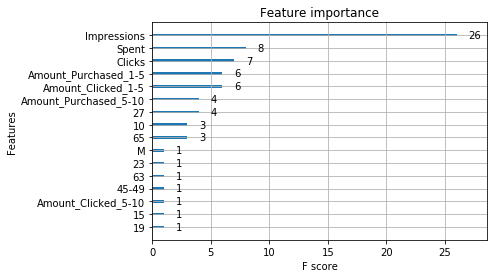

In [115]:
# plot feature importance
from xgboost import plot_importance
plot_importance(alg)
plt.show()

### Final Result

### Logistic Regression Model

Target variable = 'success'. Test-Train-Split my model with 80% training data and 20% testing data at a random state of 35.

Using Sklearn, I ran a baseline Logistic Regression model to examine the Accuracy and F1 score of my engineered features:

Test Accuracy score: 0.5131578947368421

Test F1 score: 0.6782608695652175

The result was not great. The predictive power of my baseline is ~51%, almost the same as flipping a coin.

### Feature Selection

I proceeded to use PolynomialFeatures in Sklearn to find all possible interaction terms and polynomials terms (to a degree of 3) and ran my Logistics Regression Model with 35,989 features. Scaling the data using StandardScaler, I arrive at the following results:

Test Accuracy score: 0.9780701754385965

Test F1 score: 0.9785407725321887

In the process of running this model, most of my coefficients went to 0 except for 4,385 features.

Creating a Confusion Matrix, I examined only 2 false negatives and 3 false positives: